In [1]:
!pip install --upgrade scikit-learn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-deep')
from sklearn.metrics import confusion_matrix
import nltk
nltk.download('stopwords')

C:\Users\Deepika Sainju\AppData\Local\Temp\ipykernel_3304\851472779.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-deep')
[nltk_data] Downloading package stopwords to C:\Users\Deepika
[nltk_data]     Sainju\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# from google.colab import drive
# drive.mount('/content/bbc-text.csv')

**Check out the Data**

In [2]:
df = pd.read_csv('bbc-text.csv')
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   text      2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


# **Exploratory Data Analysis**

In [4]:
df.groupby('category').count()

,text
category,
business,510
entertainment,386
politics,417
sport,511
tech,401


Let's make a new column to detect how long the text messages are

In [5]:
df['Length'] = df['text'].apply(len)
df

# length vanne new column add gareko

,category,text,Length
0,tech,tv future in the hands of viewers with home th...,4333
1,business,worldcom boss left books alone former worldc...,1842
2,sport,tigers wary of farrell gamble leicester say ...,1342
3,sport,yeading face newcastle in fa cup premiership s...,2176
4,entertainment,ocean s twelve raids box office ocean s twelve...,1579
...,...,...,...
2220,business,cars pull down us retail figures us retail sal...,1745
2221,politics,kilroy unveils immigration policy ex-chatshow ...,955
2222,entertainment,rem announce new glasgow concert us band rem h...,1648
2223,politics,how political squabbles snowball it s become c...,4684


Let's see the percentage of ham and spam in our dataset

In [6]:
df['Length'].describe()
# min wala data hatauna parne pani huna sakxa

count     2225.00000
mean      2262.93618
std       1364.10253
min        501.00000
25%       1446.00000
50%       1965.00000
75%       2802.00000
max      25483.00000
Name: Length, dtype: float64

One of the text has 501 characters, let's use masking to find this message:

# **Text Cleaning**

Let’s clean the text for the messages in our dataset with NLP.

In [7]:
import string
from nltk.corpus import stopwords

In [8]:
string.punctuation

# punctuation= sign or special characters

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [9]:
mess = '''For me / @the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later..'''

In [10]:
nopunc = ''.join([char for char in mess if char not in string.punctuation])
print(nopunc)

# list comprehension use garera punctuation hatako
# alphabets haru matra join garne

For me  the love should start with attractioni should feel that I need her every time around meshe should be the first thing which comes in my thoughtsI would start the day and end it with hershe should be there every time I dreamlove will be then when my every breath has her namemy life should happen around hermy life will be named to herI would cry for herwill give all my happiness and take all her sorrowsI will be ready to fight with anyone for herI will be in love when I will be doing the craziest things for herlove will be when I dont have to proove anyone that my girl is the most beautiful lady on the whole planetI will always be singing praises for herlove will be when I start up making chicken curry and end up makiing sambarlife will be the most beautiful thenwill get every morning and thank god for the day because she is with meI would like to say a lotwill tell later


In [11]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to C:\Users\Deepika
[nltk_data]     Sainju\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

Let's create the function to remove all punctuation, remove all stopwords and returns a list of the cleaned text

In [12]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

**Vectorization**

Now we have the messages as lists and we need to convert each of those messages into a vector that SciKit Learn's algorithm models can work with.

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

# vectorize= sequencial data ma change gareko news lai
# CountVectorizer= words lai number ma change gareko

In [15]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(df['text'])
bow_transformer

# df['text'] mathi function ma argument ko roup ma gayera punctuation ra stopwords hatayera vectorize hunxa

CountVectorizer(analyzer=<function text_process at 0x000001F737D5C9A0>)

In [16]:
bow_transformer.vocabulary_

{'tv': 30060,
 'future': 12857,
 'hands': 13983,
 'viewers': 31069,
 'home': 14680,
 'theatre': 29138,
 'systems': 28665,
 'plasma': 22278,
 'highdefinition': 14460,
 'tvs': 30067,
 'digital': 9404,
 'video': 31050,
 'recorders': 23995,
 'moving': 19652,
 'living': 17740,
 'room': 25155,
 'way': 31461,
 'people': 21852,
 'watch': 31427,
 'radically': 23594,
 'different': 9388,
 'five': 12145,
 'years': 32218,
 'time': 29381,
 'according': 2292,
 'expert': 11405,
 'panel': 21469,
 'gathered': 13019,
 'annual': 3230,
 'consumer': 7759,
 'electronics': 10546,
 'show': 26554,
 'las': 17169,
 'vegas': 30924,
 'discuss': 9579,
 'new': 20152,
 'technologies': 28915,
 'impact': 15225,
 'one': 20842,
 'favourite': 11774,
 'pastimes': 21645,
 'us': 30743,
 'leading': 17279,
 'trend': 29828,
 'programmes': 23088,
 'content': 7793,
 'delivered': 8994,
 'via': 31005,
 'networks': 20131,
 'cable': 5898,
 'satellite': 25567,
 'telecoms': 28952,
 'companies': 7378,
 'broadband': 5541,
 'service': 2619

Print total number of vocab words

In [17]:
print(len(bow_transformer.vocabulary_))

32955


Let's take one text message and get its bag-of-words counts as a vector, putting to use our new bow_transformer

In [18]:
message4 = df['text'][3]
print(message4)

yeading face newcastle in fa cup premiership side newcastle united face a trip to ryman premier league leaders yeading in the fa cup third round.  the game - arguably the highlight of the draw - is a potential money-spinner for non-league yeading  who beat slough in the second round. conference side exeter city  who knocked out doncaster on saturday  will travel to old trafford to meet holders manchester united in january. arsenal were drawn at home to stoke and chelsea will play host to scunthorpe. the only other non-league side in the draw are hinckley united  who held brentford to a goalless draw on sunday. they will meet league one leaders luton if they win their replay against martin allen s team at griffin park.  a number of premiership teams face difficult away games against championship sides on the weekend of 8/9 january. third-placed everton visit plymouth  liverpool travel to burnley  crystal palace go to sunderland  fulham face carling cup semi-finalists watford  bolton mee

Now let's see its vector representation

Now let's transform the entire DataFrame of messages and create sparse matrix

In [19]:
messages_bow = bow_transformer.transform(df['text'])
messages_bow

# number lai matrix ma transform gareko

<2225x32955 sparse matrix of type '<class 'numpy.int64'>'
	with 351196 stored elements in Compressed Sparse Row format>

In [20]:
print('Shape of Sparse Matrix: ', messages_bow.shape)

Shape of Sparse Matrix:  (2225, 32955)


# **TF-IDF**

Now let's compute term weighting and do normalisation with TF-IDF

In [21]:
# Normalization
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer().fit(messages_bow)
tfidf4 = tfidf_transformer.transform(messages_bow)
print(tfidf4)

# mathi number ma convert hunda dherai thulo number vayo so sano number ma convert gareko
# 0 index ma vayeko () word lai () ma change gareko

  (0, 32269)	0.037935187764147046
  (0, 32236)	0.02502710456830842
  (0, 32218)	0.033864397027638396
  (0, 32028)	0.03710594759218775
  (0, 31992)	0.02100667673046039
  (0, 31813)	0.03664812000393144
  (0, 31808)	0.09589102026311293
  (0, 31569)	0.01883413134132603
  (0, 31511)	0.02678740422843605
  (0, 31461)	0.03734874333099458
  (0, 31427)	0.136138533411439
  (0, 31347)	0.14814741780153445
  (0, 31069)	0.10864793656258968
  (0, 31068)	0.04861588905896267
  (0, 31050)	0.05626926860855512
  (0, 31020)	0.03695029588627538
  (0, 31005)	0.03145737594843765
  (0, 30924)	0.04141750597288596
  (0, 30764)	0.021827078427897984
  (0, 30743)	0.10694223933162789
  (0, 30718)	0.052098207267701584
  (0, 30204)	0.03992163146528098
  (0, 30183)	0.05650239402397808
  (0, 30069)	0.06175011629580761
  (0, 30067)	0.09245260244321195
  :	:
  (2224, 9895)	0.12109971024430365
  (2224, 8984)	0.11442471146497192
  (2224, 8820)	0.056428957311948434
  (2224, 8637)	0.09213091532167896
  (2224, 8460)	0.129959324

In [22]:
print(tfidf4.shape)

(2225, 32955)


In [ ]:
# from sklearn.svm import SVC
# from datetime import datetime
# start_time = datetime.now()

# model = SVC()
# model.fit(x_train,y_train)

# end_time = datetime.now()
# process_time = round(end_time-start_time,2)
# print("Fitting SVC took {} seconds".format(process_time))

**Train Test Split**

In [23]:
from sklearn.model_selection import train_test_split

text_train, text_test, label_train, label_test = train_test_split(df['text'], df['category'], test_size=0.2,shuffle=True)



**Creating a Data Pipeline**

Let's run our model again and then predict the test set. We will create and use a pipeline for this purpose

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', SVC()),  # train on TF-IDF vectors w/ SVM
])

# svc= support vector classifier

In [25]:
pipeline.fit(text_train,label_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', SVC())])

In [26]:
text_test.iloc[1:2].values

array(['asylum children to face returns the uk government is planning to return asylum seeker children without parents to albania.  the trial scheme  which could start in weeks  may be extended to apply to children from other countries. children s charities have reacted with alarm  saying the policy amounts to forcible removal and may not guarantee the safety of those affected. but the home office says it may be in the children s best interests if it reunites them with their communities.  the pilot  included in the government s five-year immigration plan  aims to return unaccompanied asylum-seeking children from albania who have failed in their asylum claims.  since 2002  at least 9 000 under-18s have arrived in the uk to seek asylum without other family members. these children automatically become the responsibility of social services. up to now  ministers have held back from final removal orders against unaccompanied children until after they are legally adults at 18. at least a doze

In [27]:
predictions = pipeline.predict(text_test)
predictions

array(['politics', 'politics', 'entertainment', 'entertainment', 'sport',
       'politics', 'sport', 'sport', 'politics', 'entertainment', 'tech',
       'entertainment', 'politics', 'sport', 'sport', 'business',
       'entertainment', 'business', 'politics', 'business', 'business',
       'tech', 'entertainment', 'tech', 'entertainment', 'business',
       'entertainment', 'sport', 'sport', 'sport', 'sport',
       'entertainment', 'tech', 'politics', 'politics', 'tech',
       'entertainment', 'sport', 'business', 'sport', 'politics',
       'politics', 'business', 'sport', 'tech', 'sport', 'business',
       'politics', 'entertainment', 'business', 'sport', 'business',
       'business', 'politics', 'tech', 'tech', 'tech', 'tech', 'business',
       'sport', 'sport', 'sport', 'politics', 'politics', 'entertainment',
       'politics', 'business', 'tech', 'entertainment', 'tech', 'tech',
       'sport', 'tech', 'business', 'entertainment', 'business',
       'business', 'politics',

In [28]:
class_names = np.array(['International',
'blog',
'entertainment',
'political',
'social',
'sports',
'view'])

# **Making Confusion Matrix**

Confusion Matrix is going to contain the correct predictions that our model made on the set as well as the incorrect predictions.

In [29]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(label_test,predictions)
print(cm)

[[112   1   1   0   0]
 [  0  80   1   0   0]
 [  3   1  72   1   0]
 [  0   0   0 101   0]
 [  2   2   1   1  66]]


In [30]:
# confusion matrix and classification report(precision, recall, F1-score)
# ytest = np.array(label_test)
print(classification_report(pipeline.predict(text_test),label_test))

               precision    recall  f1-score   support

     business       0.98      0.96      0.97       117
entertainment       0.99      0.95      0.97        84
     politics       0.94      0.96      0.95        75
        sport       1.00      0.98      0.99       103
         tech       0.92      1.00      0.96        66

     accuracy                           0.97       445
    macro avg       0.96      0.97      0.97       445
 weighted avg       0.97      0.97      0.97       445



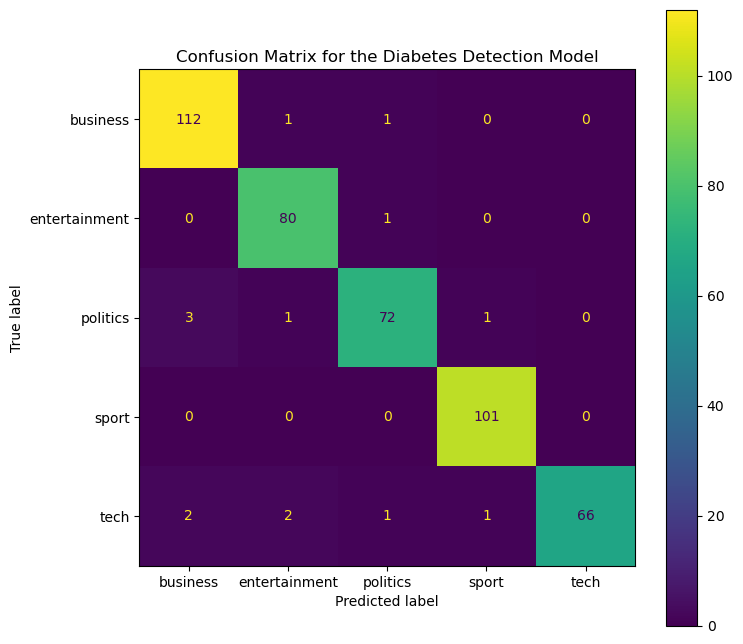

In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
class_names =['business','entertainment','politics','sport','tech']
# Change figure size and increase dpi for better resolution
# and get reference to axes object
fig, ax = plt.subplots(figsize=(8,8), dpi=100)

# initialize using the raw 2D confusion matrix
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(cm, display_labels=class_names)

# set the plot title using the axes object
ax.set(title='Confusion Matrix for the Diabetes Detection Model')

# show the plot.
# Pass the parameter ax to show customizations (ex. title)
display.plot(ax=ax);

In [32]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(predictions,label_test))

Accuracy: 0.9685393258426966


In [34]:
# file = open('/content/news.txt','r')
# news = file.read()
# file.close()

news = input("Enter news = ")
news_data = {'predict_news':[news]}
news_data_df = pd.DataFrame(news_data)

predict_news_cat = pipeline.predict(news_data_df['predict_news'])
print("Predicted news category = ",predict_news_cat[0])

Enter news = Click to share on Facebook (Opens in new window) Click to share on Twitter (Opens in new window) Celebrity Sightings In New York City - October 26, 2023, Taylor Swift Gotham/GC Images Time won’t fly, but Taylor Swift will — as long as boyfriend Travis Kelce is out there waiting.  Swift, 33, touched down in Kansas City on Monday, November, 27, a source exclusively tells Us Weekly. The pop star’s arrival comes just one day after she wrapped up the last of her 2023 Eras Tour shows in São Paulo, Brazil. (The tour will pick back up in Tokyo in February 2024.)  Spicy Pasta with Shrimp and Tomatoes Next Stay     Auto (225p) 225p 360p Subtitles Off The singer’s recent concert dates have kept her from being able to support Kelce, 34, in person. After cheering him on at various NFL games earlier this year, Swift was not in attendance to watch the Chiefs defeat the Las Vegas Raiders 31-17 on Sunday, November 26, as she was busy with her final Brazil show.
Predicted news category =  e